###### *Adaptação de artigo publicado em* https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/

##### Vamos construir um Simples Sistema de Recomendação de Filmes, utilizando a correlação entre as classificações que os usuários deram para cada Filme.

In [0]:
import numpy as np  
import pandas as pd 

In [0]:
urlDataSet = 'https://raw.githubusercontent.com/EngenhariaDeComputacaoReinaldo/miniCursoPandas/master/ml-latest-small/'

In [0]:
ratings_data = pd.read_csv(urlDataSet+'ratings.csv')
movie_names = pd.read_csv(urlDataSet+'movies.csv')  

In [0]:
ratings_data.head(10)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [0]:
movie_names.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [0]:
movie_data = pd.merge(ratings_data, movie_names, on='movieId')

In [0]:
movie_data.head(10)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
5,18,1,3.5,1455209816,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
6,19,1,4.0,965705637,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
7,21,1,3.5,1407618878,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
8,27,1,3.0,962685262,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
9,31,1,5.0,850466616,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [0]:
print(len(ratings_data),len(movie_names), len(movie_data))

100836 9742 100836


Agora vamos dar uma olhada na classificação média de cada filme. Para fazer isso, podemos agrupar o conjunto de dados pelo título do filme e, em seguida, calcular a média da classificação de cada filme. Em seguida, exibiremos os cinco primeiros filmes junto com sua classificação média

In [0]:
movie_data.groupby('title')['rating'].mean().head(10)  

title
'71 (2014)                                 4.000000
'Hellboy': The Seeds of Creation (2004)    4.000000
'Round Midnight (1986)                     3.500000
'Salem's Lot (2004)                        5.000000
'Til There Was You (1997)                  4.000000
'Tis the Season for Love (2015)            1.500000
'burbs, The (1989)                         3.176471
'night Mother (1986)                       3.000000
(500) Days of Summer (2009)                3.666667
*batteries not included (1987)             3.285714
Name: rating, dtype: float64

Você pode ver que as avaliações médias não são classificadas. Vamos classificar as avaliações na ordem decrescente de suas avaliações médias:

In [0]:
movie_data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Karlson Returns (1970)                           5.0
Winter in Prostokvashino (1984)                  5.0
My Love (2006)                                   5.0
Sorority House Massacre II (1990)                5.0
Winnie the Pooh and the Day of Concern (1972)    5.0
Sorority House Massacre (1986)                   5.0
Bill Hicks: Revelations (1993)                   5.0
My Man Godfrey (1957)                            5.0
Hellbenders (2012)                               5.0
In the blue sea, in the white foam. (1984)       5.0
Name: rating, dtype: float64

Os filmes agora foram classificados de acordo com a ordem crescente de suas classificações. No entanto, existe um problema. Um filme pode chegar ao topo da lista acima, mesmo que apenas um único usuário tenha dado cinco estrelas. Portanto, as estatísticas acima podem ser enganosas. Normalmente, um filme que é realmente bom recebe uma classificação mais alta por um grande número de usuários.

In [0]:
movie_data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Forrest Gump (1994)                          329
Shawshank Redemption, The (1994)             317
Pulp Fiction (1994)                          307
Silence of the Lambs, The (1991)             279
Matrix, The (1999)                           278
Star Wars: Episode IV - A New Hope (1977)    251
Jurassic Park (1993)                         238
Braveheart (1995)                            237
Terminator 2: Judgment Day (1991)            224
Schindler's List (1993)                      220
Name: rating, dtype: int64

Agora você pode ver alguns filmes realmente bons no topo. A lista acima confirma nossa afirmação de que bons filmes normalmente recebem classificações mais altas. Agora sabemos que a avaliação média por filme e o número de classificações por filme são atributos importantes. Vamos criar um novo dataframe que contenha esses dois atributos.

Criando um DataFrame com Mean and Count dos Ratings dos Filmes

In [0]:
ratings_mean_count = pd.DataFrame(movie_data.groupby('title')['rating'].mean()) 
ratings_mean_count.head(5)

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [0]:
ratings_mean_count['rating_counts'] = pd.DataFrame(movie_data.groupby('title')['rating'].count())
ratings_mean_count.head(5)

,rating,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [0]:
ratings_mean_count = ratings_mean_count.rename(index=str, columns={"rating": "rating_means"})

In [0]:
ratings_mean_count.head(5)

,rating_means,rating_counts
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


Você pode ver o título do filme, juntamente com a ratings média e o número de ratings do filme.

Vamos traçar um histograma para o número de avaliações representadas pela coluna "rating_counts" no dataframe acima. Execute o seguinte script:

In [0]:
import matplotlib.pyplot as plt  
import seaborn as sns  
sns.set_style('dark')  
%matplotlib inline 

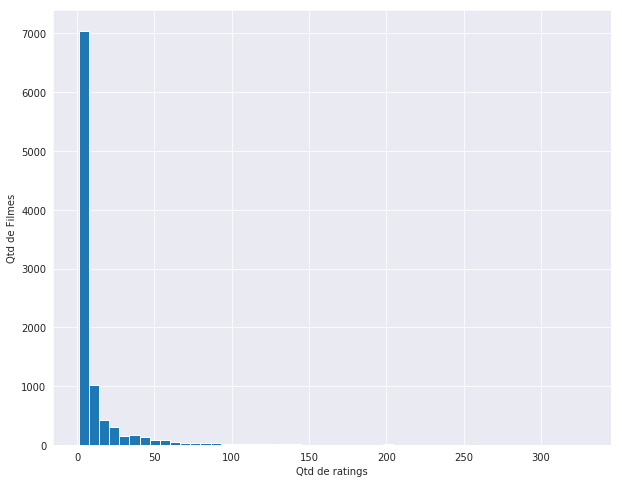

In [0]:
plt.figure(figsize=(10,8))  
plt.rcParams['patch.force_edgecolor'] = True 

plt.ylabel('Qtd de Filmes')
plt.xlabel('Qtd de ratings')

ratings_mean_count['rating_counts'].hist(bins=50)



A partir da saída, você pode ver que a maioria dos filmes recebeu menos de 50 classificações. Enquanto o número de filmes com mais de 100 classificações é muito baixo.

Agora vamos traçar um histograma para as classificações médias:

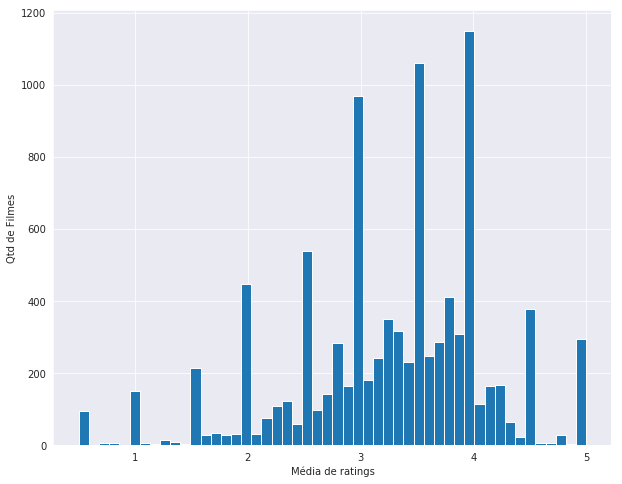

In [0]:
plt.figure(figsize=(10,8))  
plt.rcParams['patch.force_edgecolor'] = True

plt.ylabel('Qtd de Filmes')
plt.xlabel('Média de ratings')

ratings_mean_count['rating_means'].hist(bins=50) 

Você pode ver que os valores inteiros têm barras mais altas do que os valores flutuantes, já que a maioria dos usuários atribui a classificação como valor inteiro, isto é, 1, 2, 3, 4 ou 5. Além disso, é evidente que os dados têm uma distribuição normal fraca com os valores. média de cerca de 3,5. Existem alguns valores discrepantes nos dados.

Anteriormente, dissemos que filmes com um número maior de avaliações geralmente têm uma classificação média alta, já que um filme bom é normalmente conhecido e um filme conhecido é assistido por um grande número de pessoas e, portanto, geralmente tem Avaliação. Vamos ver se esse também é o caso dos filmes em nosso conjunto de dados. Vamos traçar as avaliações médias em relação ao número de classificações:

<Figure size 576x432 with 0 Axes>

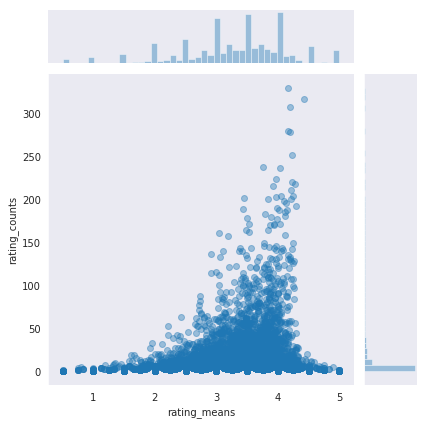

In [0]:
plt.figure(figsize=(8,6))  
plt.rcParams['patch.force_edgecolor'] = True  
sns.jointplot(x='rating_means', y='rating_counts', data=ratings_mean_count, alpha=0.4)


O gráfico mostra que, em geral, os filmes com classificações médias mais altas têm, na verdade, maior número de classificações, em comparação com os filmes com classificações médias mais baixas.


## **Similaridade Entre Filmes**

Vamos usar a correlação entre as avaliações de um filme como a métrica de similaridade. Para encontrar a correlação entre as classificações do filme, precisamos criar uma matriz em que cada coluna seja um nome de filme e cada linha contenha a classificação atribuída por um usuário específico a esse filme. Tenha em mente que essa matriz terá muitos valores nulos, pois cada filme não é classificado por todos os usuários.

In [0]:
user_movie_rating = movie_data.pivot_table(index='userId', columns='title', values='rating')  

In [0]:
user_movie_rating.head(10)  

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


Sabemos que cada coluna contém todas as classificações de usuários de um filme específico. Vamos encontrar todas as avaliações do usuário para o filme "Forrest Gump (1994)" e encontrar os filmes semelhantes a ele. Escolhemos este filme porque tem o maior número de classificações e queremos encontrar a correlação entre os filmes que têm um maior número de classificações.

In [0]:
forrest_gump_ratings = user_movie_rating['Forrest Gump (1994)']  

In [0]:
forrest_gump_ratings.head()  

userId
1    4.0
2    NaN
3    NaN
4    NaN
5    NaN
Name: Forrest Gump (1994), dtype: float64

Agora vamos recuperar todos os filmes que são semelhantes a "Forrest Gump (1994)". Podemos encontrar a correlação entre as classificações de usuários para "Forest Gump (1994)" e todos os outros filmes usando a corrwith()função mostrada abaixo:

In [0]:
movies_like_forest_gump = user_movie_rating.corrwith(forrest_gump_ratings)

corr_forrest_gump = pd.DataFrame(movies_like_forest_gump, columns=['Correlation'])  
corr_forrest_gump.dropna(inplace=True)  
corr_forrest_gump.head()

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,Correlation
title,
"'burbs, The (1989)",0.197712
(500) Days of Summer (2009),0.234095
*batteries not included (1987),0.892710
...And Justice for All (1979),0.928571
10 Cent Pistol (2015),-1.000000


No script acima, primeiro recuperamos a lista de todos os filmes relacionados a "Forrest Gump (1994)", juntamente com seu valor de correlação, usando a corrwith()função. Em seguida, criamos um dataframe que contém as colunas de título e correlação do filme. Em seguida, removemos todos os valores de NA do dataframe e exibimos suas primeiras 5 linhas usando a headfunção.

Vamos classificar os filmes em ordem descendente de correlação para ver filmes altamente correlacionados no topo

In [0]:
corr_forrest_gump.sort_values('Correlation', ascending=False).head(10)  

,Correlation
title,
Lost & Found (1999),1.0
"Century of the Self, The (2002)",1.0
The 5th Wave (2016),1.0
Play Time (a.k.a. Playtime) (1967),1.0
Memories (Memorîzu) (1995),1.0
Playing God (1997),1.0
Killers (2010),1.0
"Girl Walks Home Alone at Night, A (2014)",1.0
Tampopo (1985),1.0


A partir da saída, você pode ver que os filmes que têm alta correlação com "Forrest Gump (1994)" não são muito conhecidos. Isso mostra que a correlação sozinha não é uma boa métrica para a similaridade, porque pode haver um usuário que assistiu "Forest Gump (1994)" e apenas um outro filme e classificou os dois como 5.

Uma solução para esse problema é recuperar apenas os filmes correlacionados que tenham pelo menos mais de 50 classificações. Para fazer isso, adicione a rating_countscoluna do rating_mean_countdataframe ao nosso corr_forrest_gumpdataframe. Execute o seguinte script para fazer isso:

In [0]:
corr_forrest_gump = corr_forrest_gump.join(ratings_mean_count['rating_counts'])  
corr_forrest_gump.head()  

,Correlation,rating_counts
title,,
"'burbs, The (1989)",0.197712,17
(500) Days of Summer (2009),0.234095,42
*batteries not included (1987),0.892710,7
...And Justice for All (1979),0.928571,3
10 Cent Pistol (2015),-1.000000,2


Você pode ver que o filme "$9,99", que tem a maior correlação, tem apenas três avaliações. Isso significa que apenas três usuários deram as mesmas classificações para "Forest Gump (1994)", "US $ 9,99". No entanto, podemos deduzir que um filme não pode ser declarado semelhante ao outro filme baseado em apenas 3 classificações. É por isso que adicionamos a coluna "rating_counts". Vamos agora filtrar filmes correlacionados a "Forest Gump (1994)", que têm mais de 50 avaliações. O código a seguir fará isso:

In [0]:
corr_forrest_gump[corr_forrest_gump ['rating_counts']>50].sort_values('Correlation', ascending=False).head(10)  

,Correlation,rating_counts
title,,
Forrest Gump (1994),1.000000,329
Mr. Holland's Opus (1995),0.652144,80
Pocahontas (1995),0.550118,68
Grumpier Old Men (1995),0.534682,52
Caddyshack (1980),0.520328,52
"Few Good Men, A (1992)",0.517146,57
Field of Dreams (1989),0.503845,56
Big (1988),0.492351,91
Hook (1991),0.484676,53


Agora você pode ver na saída os filmes que estão altamente correlacionados com "Forrest Gump (1994)". Os filmes da lista são alguns dos mais famosos filmes de Hollywood, e desde que "Forest Gump (1994)" também é um filme muito famoso, há uma grande chance de que esses filmes sejam correlacionados.